In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Profiling for EDA

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='credit_card_output.html')

<ipython-input-4-808d2fc03e57>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Data Preprocessing
* numeric v.s. categorical, change categorical to dummies
* missing values

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
numeric_variable = list(df.select_dtypes(include = np.number).columns)
df_temp = df.drop(numeric_variable, axis = 1)
non_numeric_variable = list(df_temp.columns)
df_temp.head()
#All numerical variables

""
0
1
2
3
4


In [5]:
df.isnull().mean().sort_values(ascending = False).head()

Class    0.0
V14      0.0
V1       0.0
V2       0.0
V3       0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2994A0D30>,
      dtype=object)

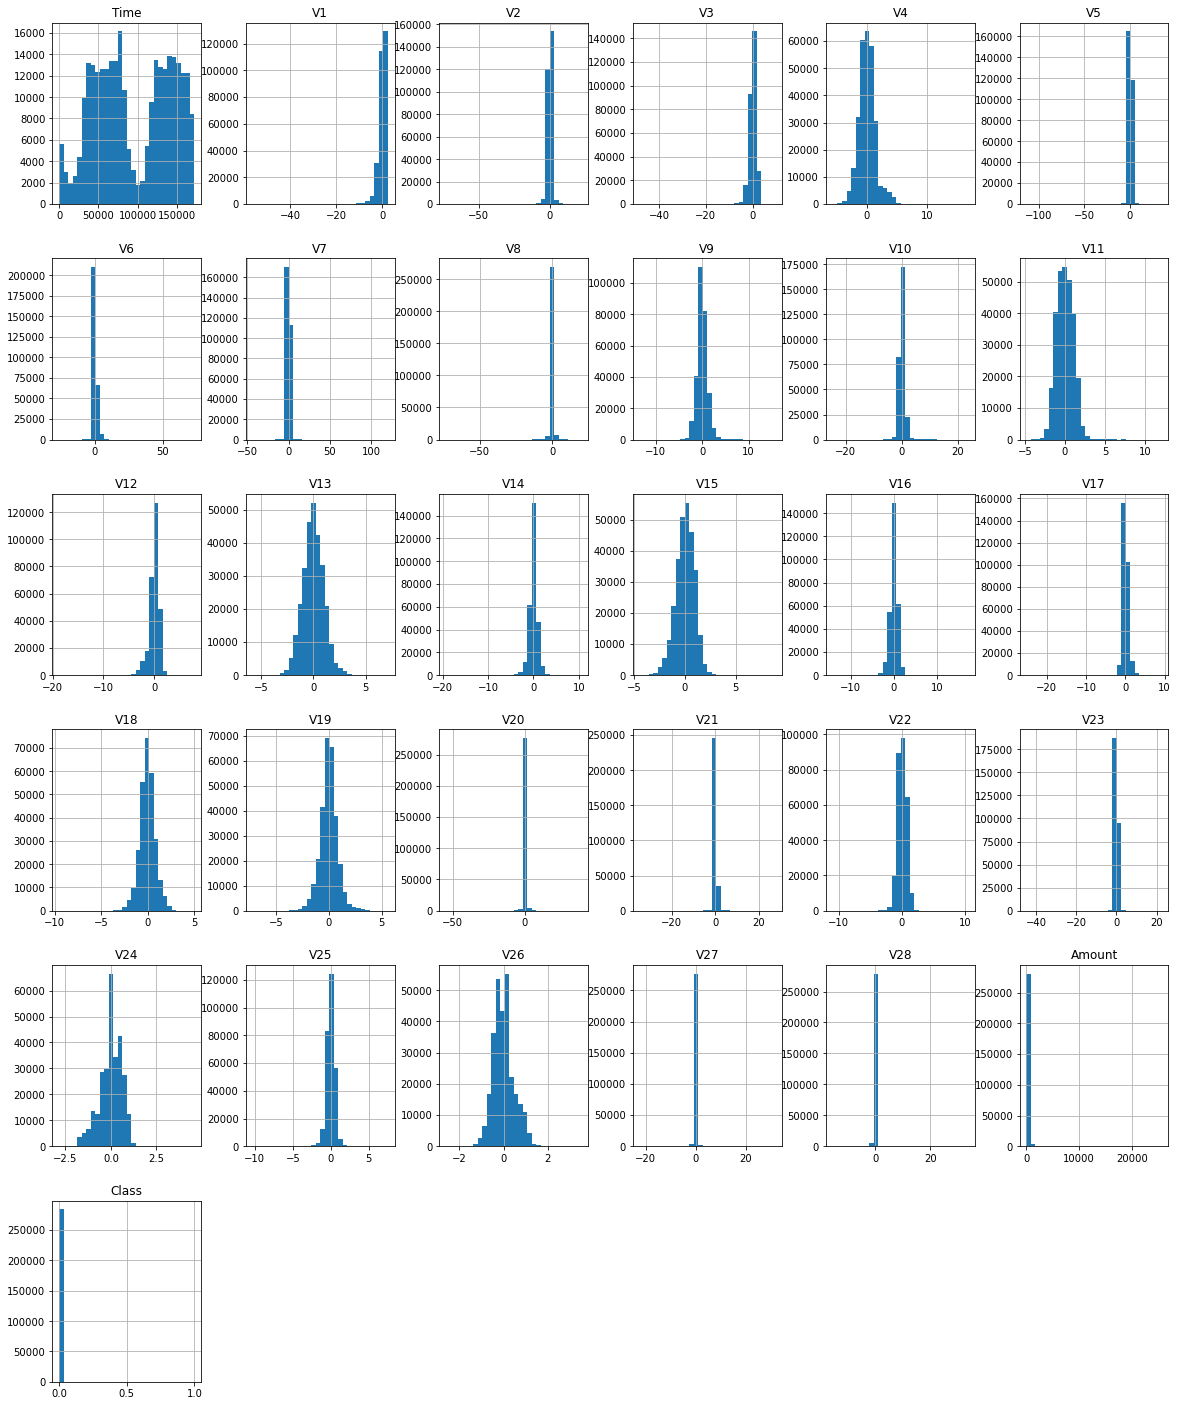

In [6]:
df.hist(bins = 30, figsize = (20,25))

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Outlier Processing and Data Scaling

In [8]:
from scipy.stats.mstats import winsorize

features_to_winsorize = list(df.columns)
to_remove = ['scaled_amount', 'scaled_time', 'Class']
for ele in to_remove:
    features_to_winsorize.remove(ele)
    
#Winsorize
df[features_to_winsorize] = df[features_to_winsorize].apply(lambda x: winsorize(x, limits = [0.01, 0.01]))
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [9]:
from sklearn.compose import ColumnTransformer

#Scaling
features_for_scaler = features_to_winsorize

ct = ColumnTransformer(
    [('standard', StandardScaler(), features_for_scaler)],
    remainder = 'passthrough'
)


df1 = ct.fit_transform(df)
df = pd.DataFrame(df1, columns = df.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E29A8ED2E0>,
      dtype=object)

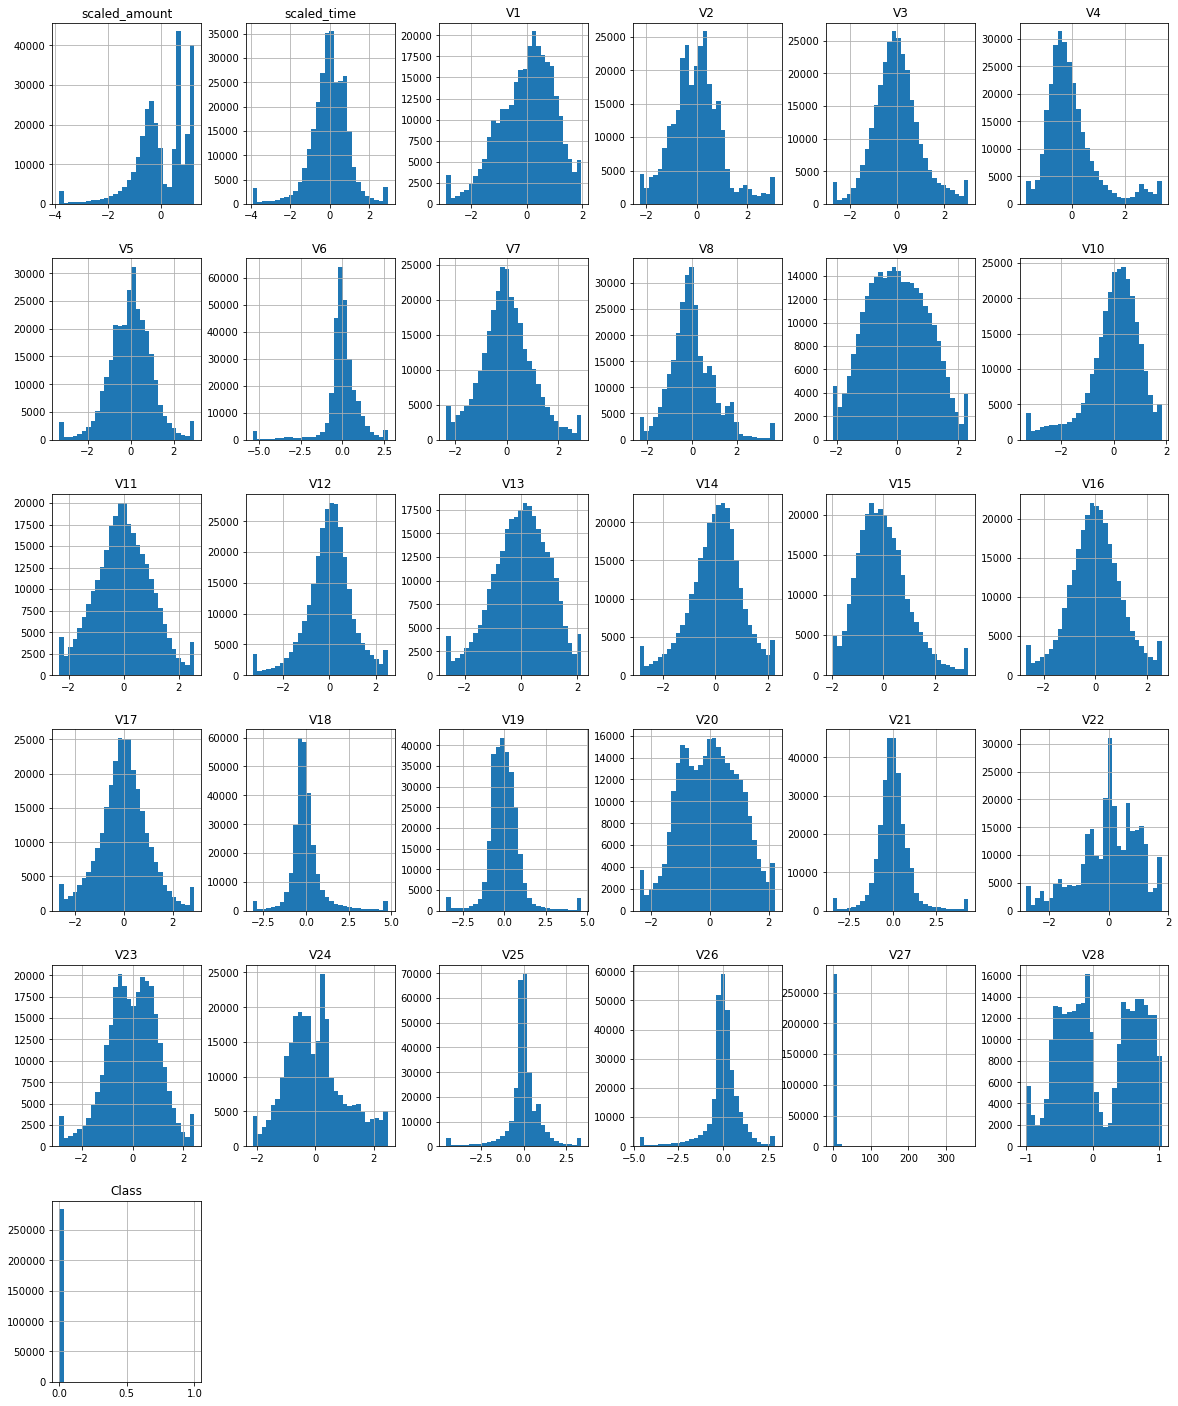

In [10]:
df.hist(bins = 30, figsize = (20,25))

### Split some data for out of sample test

In [11]:
from sklearn.model_selection import train_test_split
y = df["Class"]
X = df.drop("Class", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

C:\Users\mc590\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


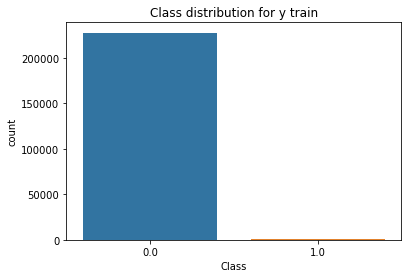

In [12]:
sns.countplot(y_train)
plt.title("Class distribution for y train")
plt.show()

### Cross Validation and GridSearch

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

sss = StratifiedKFold(n_splits=5, shuffle=False)

log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#Control learning rate
eta_range = [0.1, 0.3]
#Maximum depth of a tree
max_depth_range = [4,6,8,10]
XGBoost_grid = {
    'eta' : eta_range,
    'max_depth' : max_depth_range
}

roc_auc_under_log = []
roc_auc_over_log = []
roc_auc_under_xgboost = []
roc_auc_over_xgboost = []

log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter = 4)
XGBoost = RandomizedSearchCV(XGBClassifier(), XGBoost_grid, n_iter = 4)

#One hyper parameter in logisitc regression, corresponds to a set of cross validation, internally balanced by sampling
#can't tune hyper params inside the cross validation，极端情况就是K fold，K特别大，那么在一个很小的dataset上tune一个params不make sense
#正确的做法是一个hyperparams对应一组cross validation
for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train.iloc[train].values, y_train.iloc[train].values)
    best_est = log_reg.best_estimator_
    prediction = best_est.predict(X_train.iloc[test].values)
    roc_auc_over_log.append(roc_auc_score(y_train.iloc[test].values, prediction))
    
    '''
    pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train.iloc[train].values, y_train.iloc[train].values)
    best_est = log_reg.best_estimator_
    prediction = best_est.predict(X_train.iloc[test].values)
    roc_auc_under_log.append(roc_auc_score(y_train.iloc[test].values, prediction))
    '''
    
    #pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), XGBoost) # SMOTE happens during Cross Validation not before..
    #model = pipeline.fit(X_train.iloc[train].values, y_train.iloc[train].values)
    #best_est = XGBoost.best_estimator_
    #prediction = best_est.predict(X_train.iloc[test].values)
    #roc_auc_over_xgboost.append(roc_auc_score(y_train.iloc[test].values, prediction))
    

In [39]:
print(roc_auc_over_log)
print(np.mean(roc_auc_over_log))
#print(roc_auc_over_xgboost)
#print(np.mean(roc_auc_over_xgboost))

[0.9355395178195292, 0.9603012486549889, 0.934539319978198, 0.9285137550453767, 0.9537688071658538]
0.9425325297327893


### Refit Again

In [17]:
Xsm_train, ysm_train = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train)
X_nearmiss, y_nearmiss = NearMiss(sampling_strategy='majority').fit_resample(X_train, y_train)

In [18]:
Xsm_train.shape

(454908, 30)

In [19]:
X_nearmiss.shape

(782, 30)

In [30]:
import time

# Logistic Regression
t0 = time.time()
log_reg_sm = log_reg.best_estimator_
log_reg_sm.fit(Xsm_train.values, ysm_train.values)
#log_reg_nm = log_under_best_est
#log_reg_nm.fit(X_nearmiss.values, y_nearmiss.values)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.5009915828704834 sec


### Out of Sample testing

In [31]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = log_reg_sm.predict(X_test.values)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56861
       Fraud       0.06      0.92      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [32]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, smote_prediction)

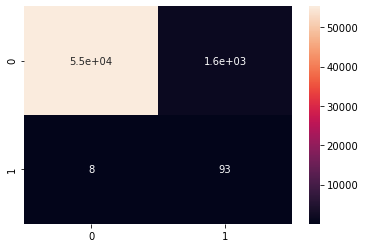

In [33]:
sns.heatmap(cf_matrix, annot=True)

In [106]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
def Tukey_IQR_winsorize(data, features):
    for x in features:
        q1 = np.percentile(data[x], 25)
        q3 = np.percentile(data[x], 75)
        iqr = q3 - q1
        floor = q1 - 1.5*iqr
        ceiling = q3 + 1.5*iqr
        data.loc[data[x] > ceiling, x] = ceiling
        data.loc[data[x] < floor, x] = floor
    return data

def three_STD_winsorize(data, features):
    for x in features:
        mean = np.mean(data[x])
        std = np.std(data[x])
        floor = mean - 3*std
        ceiling = mean + 3*std
        data.loc[data[x] > ceiling, x] = ceiling
        data.loc[data[x] < floor, x] = floor
    return data

In [108]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

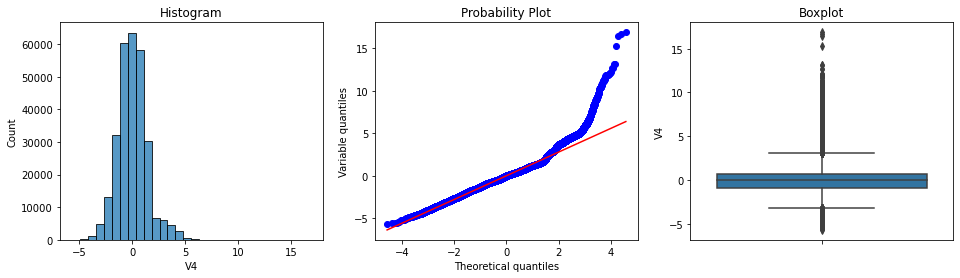

In [109]:
diagnostic_plots(df, 'V4')

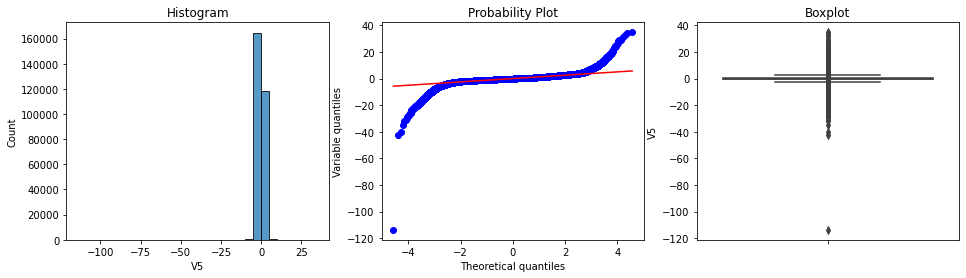

In [110]:
diagnostic_plots(df, 'V5')

In [115]:
data = Tukey_IQR_winsorize(df, ['V4', 'V5'])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


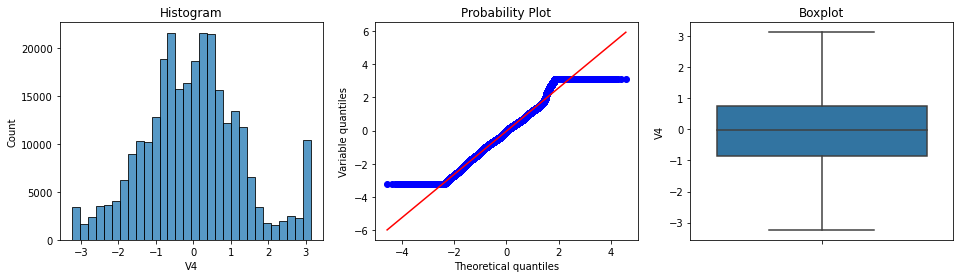

In [116]:
diagnostic_plots(df, 'V4')

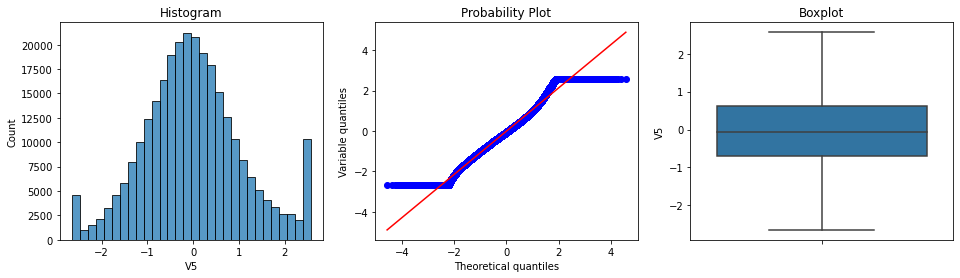

In [117]:
diagnostic_plots(df, 'V5')